In [152]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [153]:
import numpy as np
import pandas as pd

In [154]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [155]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [156]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [157]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [158]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [159]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [160]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [161]:
# Introduce inspect element
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [162]:
# Get a list of column names and types for measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [163]:
# Get a list of column names and types for station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [164]:
# View measurement rows
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [165]:
# View station rows
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [166]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [167]:
# Query first date in dataset
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [168]:
# Query last date in dataset
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [169]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

[('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-24'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-25'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-26'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-27'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-28'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-29'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-30'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-08-31'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-01'),
 ('2016-09-02'

![precipitation](Images/precipitation.png)

In [170]:
# Calculate the date 1 year ago from the last data point in the database

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_ago


datetime.date(2016, 8, 23)

In [171]:
# Perform a query to retrieve the data and precipitation scores
# Sort by date

pdata = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > one_year_ago).order_by(Measurement.date).all()
pdata

# Convert to dataframe
pdata_df = pd.DataFrame(pdata)
pdata_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [172]:
# Fill NaN values with 0
precip_data = pdata_df.fillna(0)
precip_data.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


In [173]:
# Set Date as Index

precip_data.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


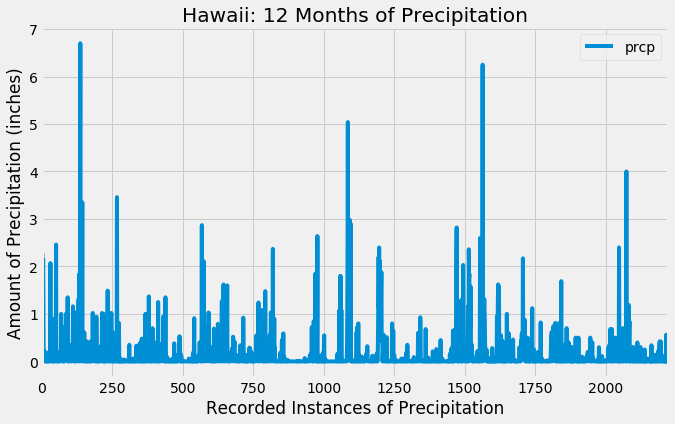

In [174]:
# Use Pandas Plotting with Matplotlib to plot the data

ax = precip_data.plot(figsize=(10,6))
ax.set_xlabel("Recorded Instances of Precipitation")
ax.set_ylabel("Amount of Precipitation (inches)")
ax.set_title("Hawaii: 12 Months of Precipitation")
plt.show()


In [175]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# With NaN values as 0
precip_data.describe()



,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [176]:
# Summary statistics with Nan values dropped
precip_dropna = pdata_df.dropna()
precip_dropna.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [177]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Measurement).group_by(Measurement.station).count()
station_count

9

In [181]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active_station = session.query(Measurement.station, func.count(Measurement.station).label('count')).group_by(Measurement.station).order_by('count').all()
print(most_active_station)

[('USC00518838', 511), ('USC00517948', 1372), ('USC00511918', 1979), ('USC00514830', 2202), ('USC00516128', 2612), ('USC00519523', 2669), ('USC00513117', 2709), ('USC00519397', 2724), ('USC00519281', 2772)]


In [182]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

temperatures = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

session.query(*temperatures).filter(Measurement.station=='USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

In [183]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_observations = session.query(Measurement.tobs).filter(Measurement.station=='USC00519281').filter(Measurement.date >= one_year_ago).order_by(Measurement.date.desc()).all()
most_observations_df = pd.DataFrame(most_observations)
most_observations_df
                                                                                                                                                    
                                                                                                                                                    
                                                                                                                                                    

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0
...,...
347,75.0
348,80.0
349,80.0
350,77.0


In [2]:
# plot the results as a histogram

plt.hist(most_observations_df['tobs'])
plt.xlabel('Temperature')
plt.ylabel('Number of Recordings')
plt.title('Station USC00519281 12 Month Recorded Temperatures')
plt.legend(['tobs'])
plt.show(bins=12)

NameError: name 'plt' is not defined

![precipitation](Images/station-histogram.png)

In [185]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [186]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

my_trip = calc_temps('2017-08-01', '2017-08-10')
my_trip


[(71.0, 79.02564102564102, 83.0)]

In [187]:
# Convert to dataframe
my_trip_df = pd.DataFrame(my_trip, columns = ['Minimum Temperature', 'Average Temperature', 'Maximum Temperature'])
my_trip_df




,Minimum Temperature,Average Temperature,Maximum Temperature
0,71.0,79.025641,83.0


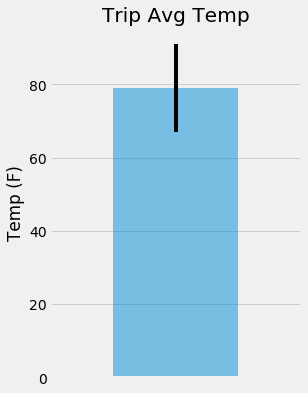

In [188]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

avg_temp = my_trip_df['Average Temperature']
peak_to_peak = 83 - 71
avg_temp.plot(kind='bar', yerr=peak_to_peak, figsize=(4,6), alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.show()

In [195]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_rainfall = session.query(Station.station, func.sum(Measurement.prcp), Station.name, Station.elevation, Station.latitude, Station.longitude).filter(Measurement.station == Station.station).filter(Measurement.date >= '2017-08-01').filter(Measurement.date <= '2017-08-10').group_by(Measurement.station).order_by(Measurement.prcp.desc()).all()
total_rainfall


[('USC00514830',
  0.32,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  7.0,
  21.5213,
  -157.8374),
 ('USC00519397', 0.04, 'WAIKIKI 717.2, HI US', 3.0, 21.2716, -157.8168),
 ('USC00519523',
  0.0,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  19.5,
  21.33556,
  -157.71139),
 ('USC00519281',
  0.06,
  'WAIHEE 837.5, HI US',
  32.9,
  21.45167,
  -157.84888999999998),
 ('USC00516128',
  0.9199999999999999,
  'MANOA LYON ARBO 785.2, HI US',
  152.4,
  21.3331,
  -157.8025)]

## Optional Challenge Assignment

In [190]:
# I will attempt this, but not for my submitted Homework.

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [191]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

start_date = '2017-08-01'
end_date = '2017-08-10'

# Use the start and end date to create a range of dates

date_range = session.query(Measurement.date).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).group_by(Measurement.date).all()

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [192]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [193]:
# Plot the daily normals as an area plot with `stacked=False`
